In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2022-06-26 13:54:26.713531: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-26 13:54:26.713578: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.5.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [3]:
adata = sc.read('/home/yiming/vio_analysis/sc/seuratobject/adata.h5ad')
adata.uns['celltype_colors'] = ['#E73986', '#F885BC', '#477AB4', '#A45B30', '#ACE093', '#E23624', 
                             '#FA9F9A', '#2E2985', '#9B4D9E', '#41AF58', '#109D7A', '#DDC23D', 
                             '#EE9B32', '#62ACE0', '#BF9BC9', '#911740']

In [4]:
adata_subset = adata[adata.obs['celltype'].isin(['Immature PSC', 'TB-like', 'NE', 'NC', 
                                                 'VEC', 'CM', 'YSE'])]
adata.obs['label'] = adata.obs['celltype']
adata_subset.obs['label'] = adata.obs['label'].replace(['NE', 'NC', 'VEC', 'CM', 'YSE'], 
                                                       ['Ectoderm', 'Ectoderm', 'Mesoderm',
                                                        'Mesoderm', 'Endoderm'])
adata_subset.uns['label_colors'] = ['#F4D58D', '#BE95C4', '#FA9F9A', '#E56B6F', '#62ACE0']

/home/yiming/.conda/envs/velocyte/lib/python3.7/site-packages/ipykernel_launcher.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  
/home/yiming/.conda/envs/velocyte/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [5]:
sc.pp.pca(adata_subset)
sc.pp.neighbors(adata_subset)
sc.tl.umap(adata_subset)
sc.tl.leiden(adata_subset, key_added="sc_clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)
running Leiden clustering
    finished: found 17 clusters and added
    'sc_clusters', the cluster labels (adata.obs, categorical) (0:00:00)


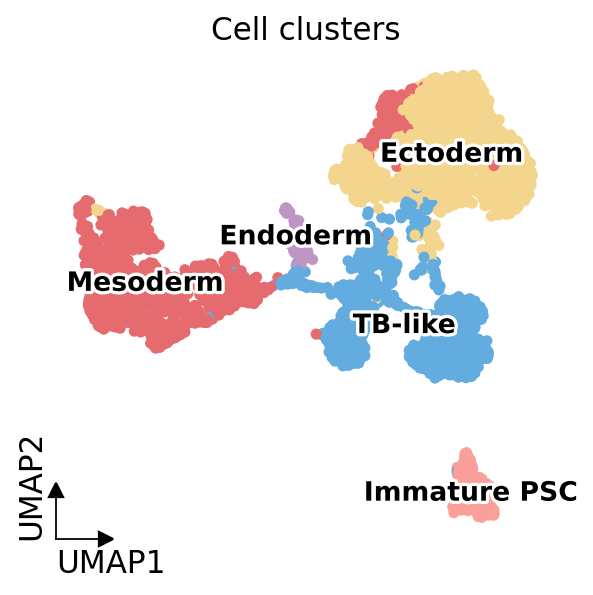

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
sc.pl.umap(adata_subset, color=['label'], legend_loc="on data", legend_fontsize=12, size=100, ax=ax, show=False, 
           legend_fontoutline=3, title = 'Cell clusters')

shrink_by = 0.1
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xbound = xlim[0] + (xlim[1] - xlim[0]) * shrink_by
ybound = ylim[0] + (ylim[1] - ylim[0]) * shrink_by

b = ax.spines["bottom"]
b.set_bounds(xlim[0], xbound)
ax.set_xlabel(ax.get_xlabel(), x=0, ha="left")
ax.plot(xbound, 0, ">k", transform=ax.get_xaxis_transform(), clip_on=False)

b = ax.spines["left"]
b.set_bounds(ylim[0], ybound)
ax.set_ylabel(ax.get_ylabel(), y=0, ha="left")
ax.plot(0, ybound, "^k", transform=ax.get_yaxis_transform(), clip_on=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

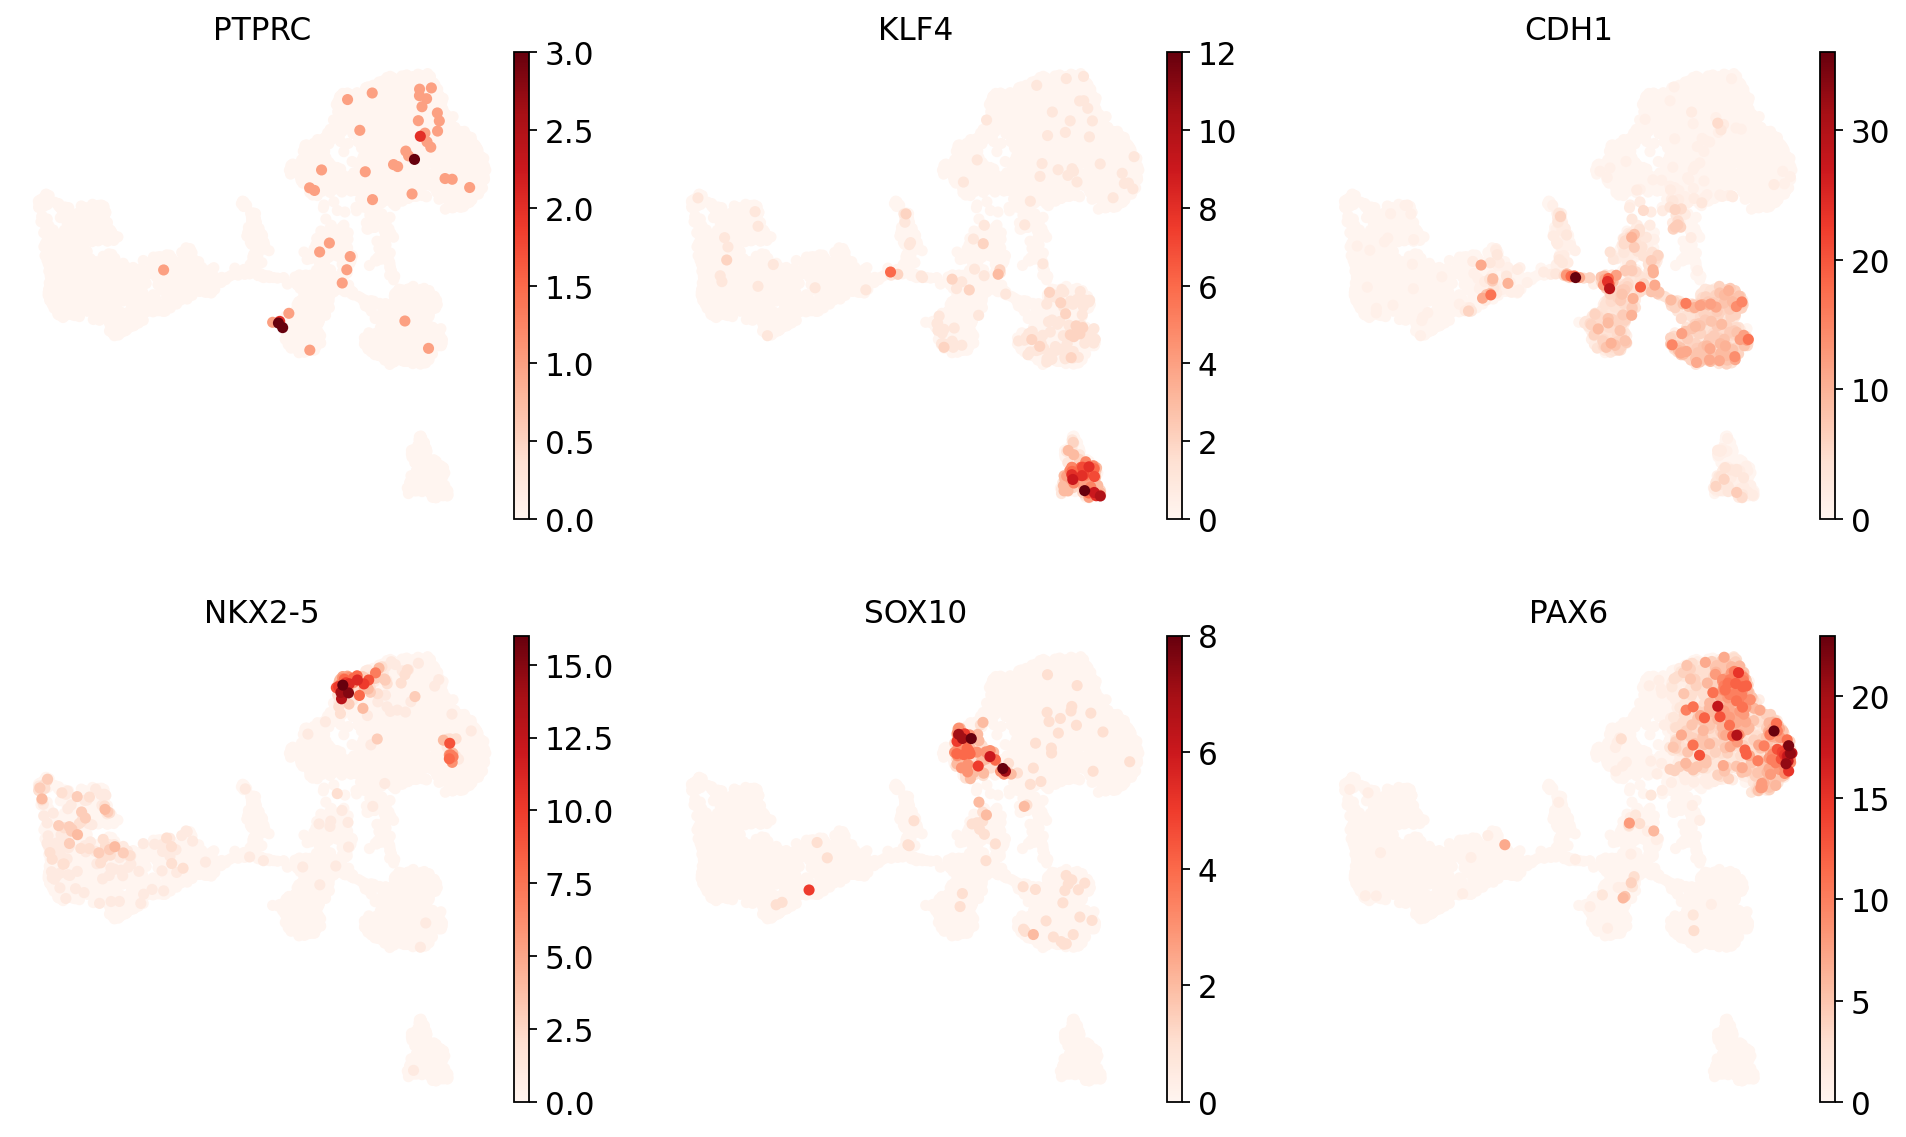

In [7]:
sc.pl.umap(adata_subset,color=['PTPRC', 'KLF4', 'CDH1', 'NKX2-5', 'SOX10', 'PAX6'],
           frameon=False, legend_loc=False, color_map='Reds', size=100, ncols=3)

In [8]:
marker_genes=['NANOG', 'SOX17', 'KLF4', 'POU5F1',  # im PSC
              'CDH1', 'TFAP2A', 'EPCAM', 'KRT7',  # TB-like
              'SOX3', 'PAX6', 'OTX2', 'NES', # ectoderm
              'PDGFRA', 'KDR', 'BMP4', 'NCAM1',  # mesoderm
              'FOXA2', 'AFP', 'APOA1', 'GATA4'] # endoderm

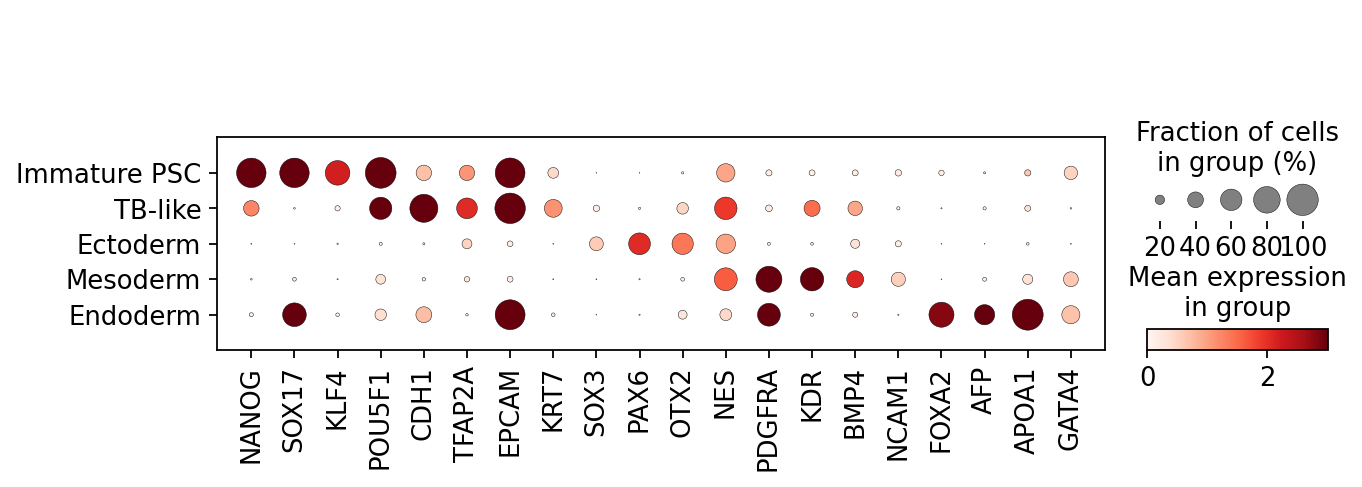

In [9]:
sc.pl.dotplot(adata_subset, var_names=marker_genes, 
              groupby=['label'], vmax=3, dot_max=1, smallest_dot=0.1, cmap='Reds', 
              categories_order=['Immature PSC', 'TB-like', 'Ectoderm', 'Mesoderm', 'Endoderm'])

In [10]:
adata_subset_d15 = adata_subset[adata_subset.obs['sample'].isin(['D15'])]

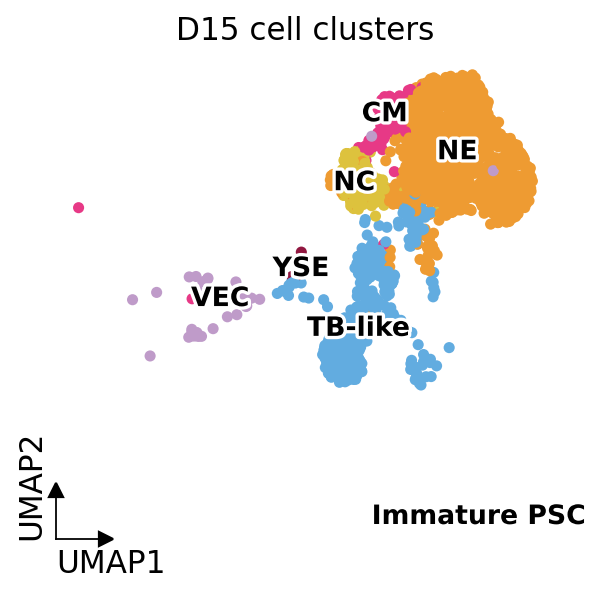

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
sc.pl.umap(adata_subset_d15, color=['celltype'], legend_loc="on data", legend_fontsize=12, size=100, ax=ax, show=False, 
           legend_fontoutline=3, title = 'D15 cell clusters')

shrink_by = 0.1
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xbound = xlim[0] + (xlim[1] - xlim[0]) * shrink_by
ybound = ylim[0] + (ylim[1] - ylim[0]) * shrink_by

b = ax.spines["bottom"]
b.set_bounds(xlim[0], xbound)
ax.set_xlabel(ax.get_xlabel(), x=0, ha="left")
ax.plot(xbound, 0, ">k", transform=ax.get_xaxis_transform(), clip_on=False)

b = ax.spines["left"]
b.set_bounds(ylim[0], ybound)
ax.set_ylabel(ax.get_ylabel(), y=0, ha="left")
ax.plot(0, ybound, "^k", transform=ax.get_yaxis_transform(), clip_on=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

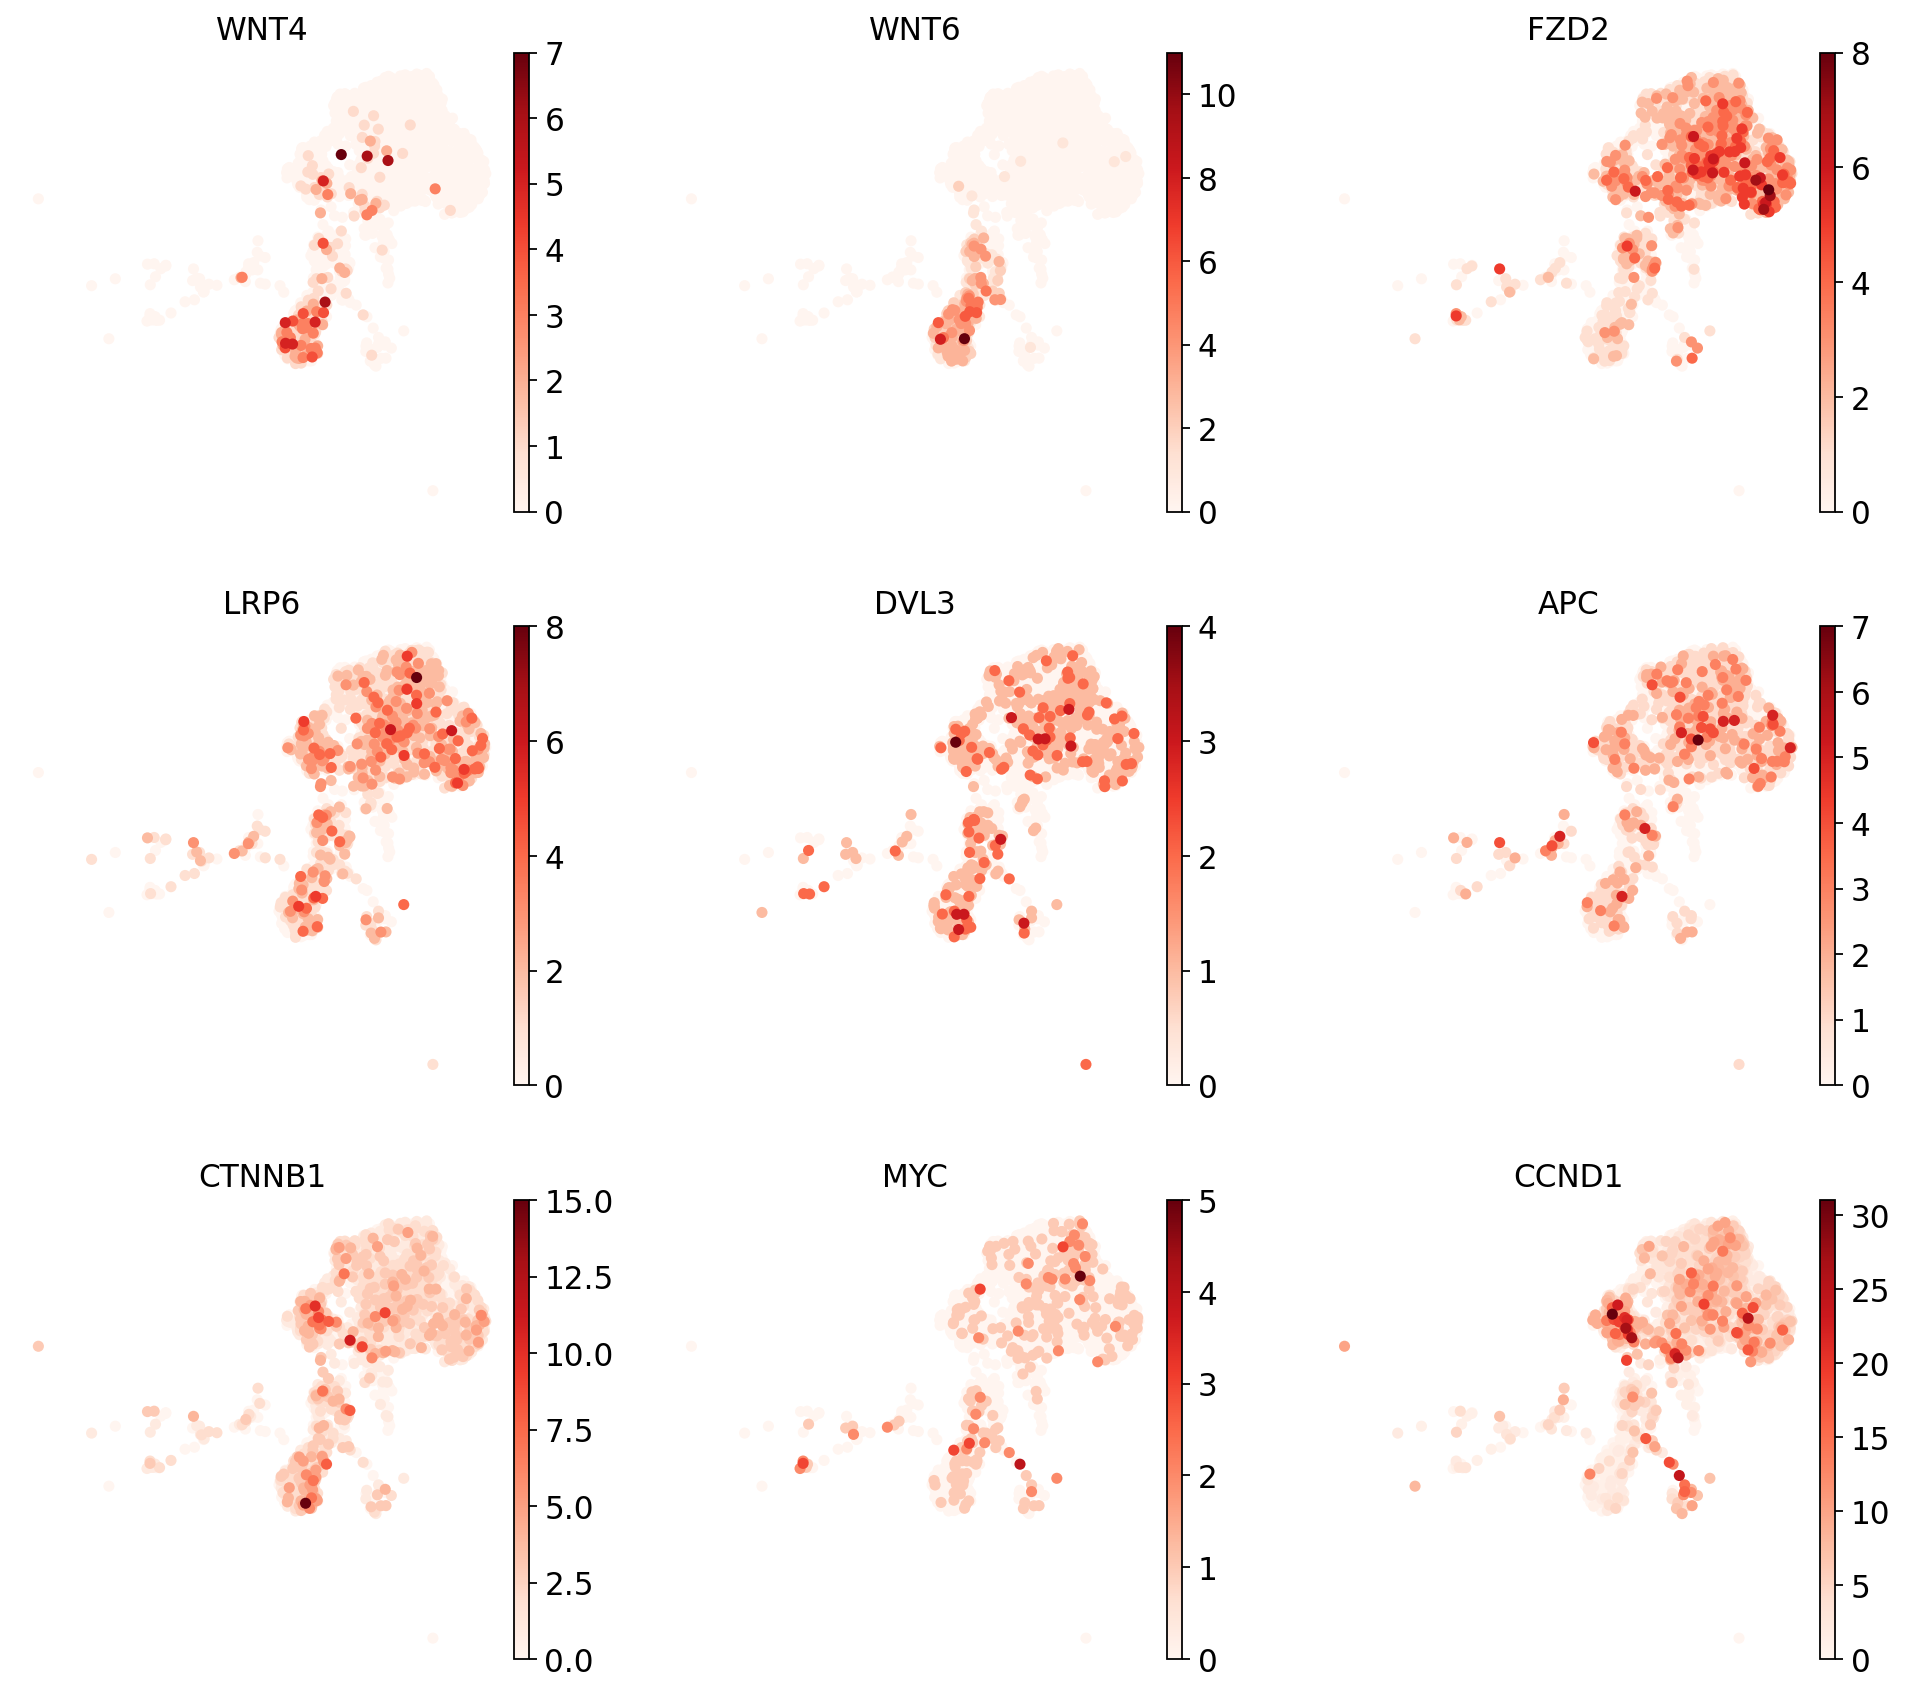

In [12]:
sc.pl.umap(adata_subset_d15, color=['WNT4', 'WNT6', 'FZD2', 'LRP6', 'DVL3', 
                                    'APC', 'CTNNB1', 'MYC', 'CCND1'], 
           legend_loc=False, color_map='Reds', size=100, ncols=3, frameon=False)